In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

pd.set_option('display.max_rows', 500)

In [2]:
_csv_path_train = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Part3_GroundTruth.csv"
_imgs_folder_train = "/home/a52550/Desktop/datasets/ISIC2017/train/ISIC-2017_Training_Data/"
_imgs_folder_train_cropped = "/home/a52550/Desktop/datasets/ISIC2017/train/cropped_images/"

_csv_path_validation = "/home/a52550/Desktop/datasets/ISIC2017/validation/ISIC-2017_Validation_Part3_GroundTruth.csv"
_imgs_folder_validation = "/home/a52550/Desktop/datasets/ISIC2017/validation/ISIC-2017_Validation_Data/"
_imgs_folder_validation_cropped = "/home/a52550/Desktop/datasets/ISIC2017/validation/cropped_images/"
_csv_path_test = "/home/a52550/Desktop/datasets/ISIC2017/test/ISIC-2017_Test_v2_Part3_GroundTruth.csv"
_imgs_folder_test = "/home/a52550/Desktop/datasets/ISIC2017/test/ISIC-2017_Test_Data/"
_imgs_folder_test_cropped = "/home/a52550/Desktop/datasets/ISIC2017/test/cropped_images/"

_csv_path_all_metrics = "results/all_metrics.csv"


In [6]:
train_data = pd.read_csv(_csv_path_train)
validation_data = pd.read_csv(_csv_path_validation)
test_data = pd.read_csv(_csv_path_test)
test_data.head()

,image_id,category
0,ISIC_0012086,2
1,ISIC_0012092,0
2,ISIC_0012095,0
3,ISIC_0012134,2
4,ISIC_0012136,2


In [7]:
train_data.category.value_counts()

0    1372
1     374
2     254
Name: category, dtype: int64

In [8]:
train_imgs_path = ["{}{}.jpg".format(_imgs_folder_train, img_id) for img_id in train_data.image_id.values]

ds = TensorDataset(torch.as_tensor([(idx, label) for idx, label in enumerate(train_data.category.values)]))
dl = DataLoader(ds, batch_size=200, shuffle=False)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

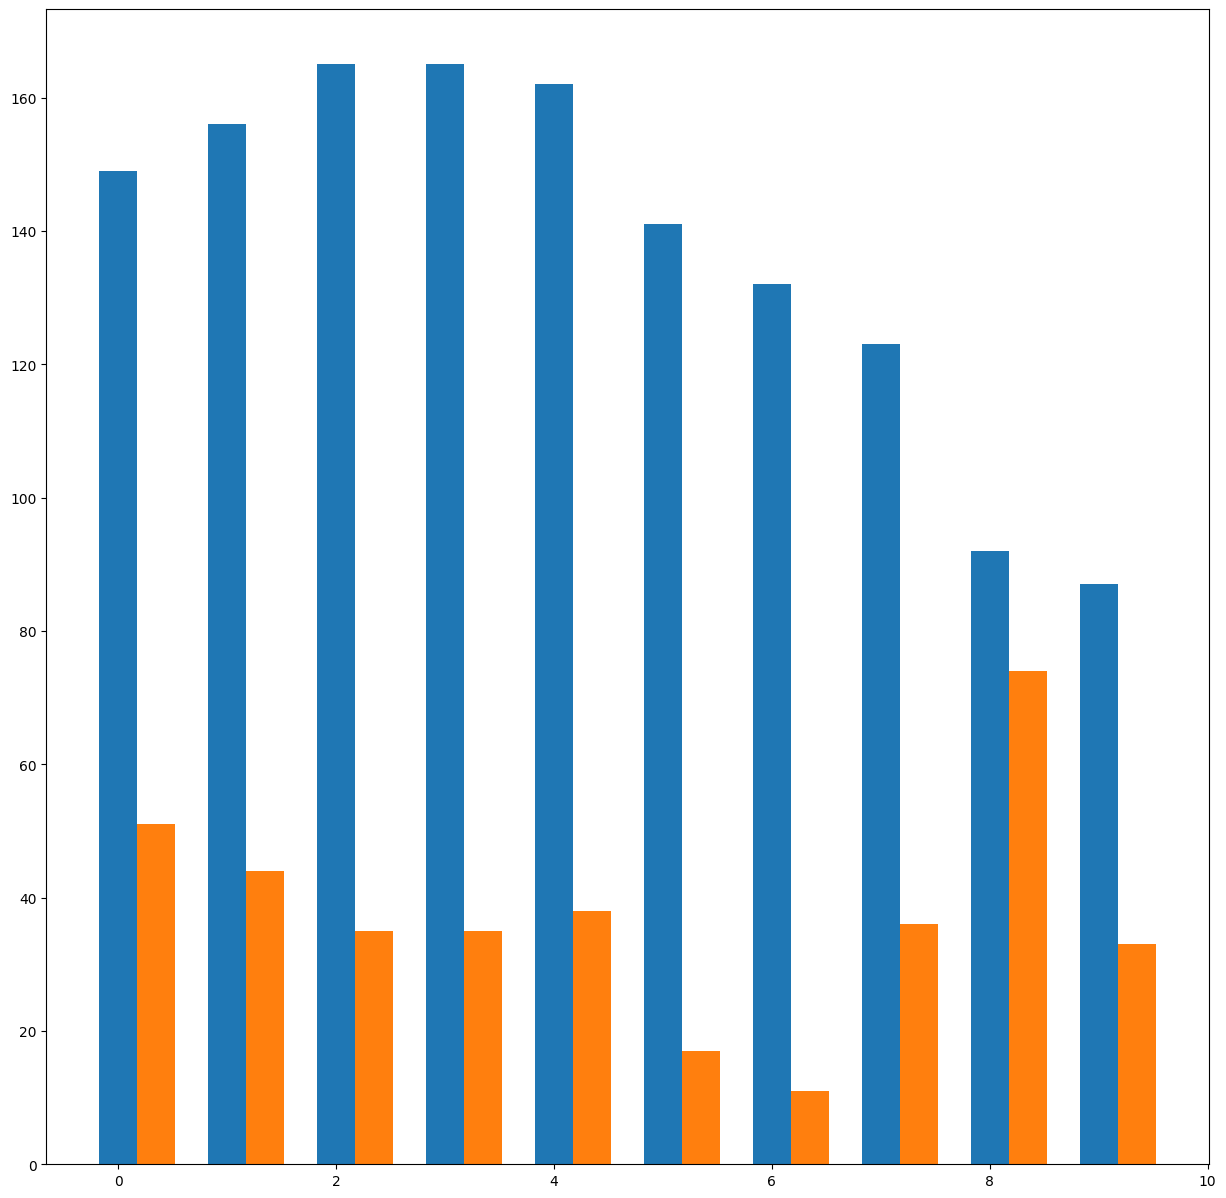

In [29]:
def visualise_dataloader(dl, id_to_label=None, with_outputs=True):
    total_num_images = len(dl.dataset)
    idxs_seen = []
    class_0_batch_counts = []
    class_1_batch_counts = []
    class_2_batch_counts = []

    for i, batch in enumerate(dl, 0):

        idxs = batch[0][:, 0].tolist()
        classes = batch[0][:, 1]
        class_ids, class_counts = classes.unique(return_counts=True)
        class_ids = set(class_ids.tolist())
        class_counts = class_counts.tolist()

        idxs_seen.extend(idxs)

        if len(class_ids) == 3:
            class_0_batch_counts.append(class_counts[0])
            class_1_batch_counts.append(class_counts[1])
            class_2_batch_counts.append(class_counts[2])
        elif len(class_ids) == 2:
            class_0_batch_counts.append(class_counts[0])
            class_1_batch_counts.append(class_counts[1])
        elif len(class_ids) == 1 and 0 in class_ids:
            class_0_batch_counts.append(class_counts[0])
            class_1_batch_counts.append(0)
        elif len(class_ids) == 1 and 1 in class_ids:
            class_0_batch_counts.append(0)
            class_1_batch_counts.append(class_counts[0])
        else:
            raise ValueError("More than two classes detected")

    if with_outputs:
        fig, ax = plt.subplots(1, figsize=(15, 15))

        ind = np.arange(len(class_0_batch_counts))
        width = 0.35

        ax.bar(
            ind,
            class_0_batch_counts,
            width,
            label=(id_to_label[0] if id_to_label is not None else "0"),
        )
        ax.bar(
            ind + width,
            class_1_batch_counts,
            width,
            label=(id_to_label[1] if id_to_label is not None else "1"),
        )
        ax.bar(
            ind + 2*width,
            class_2_batch_counts,
            width,
            label=(id_to_label[2] if id_to_label is not None else "2"),
        )
        ax.set_xticks(ind, ind + 1)
        ax.set_xlabel("Batch index", fontsize=12)
        ax.set_ylabel("No. of images in batch", fontsize=12)
        ax.set_aspect("equal")

        plt.legend()
        plt.show()

        num_images_seen = len(idxs_seen)

        print(
            f'Avg Proportion of {(id_to_label[0] if id_to_label is not None else "Class 0")} per batch: {(np.array(class_0_batch_counts) / 10).mean()}'
        )
        print(
            f'Avg Proportion of {(id_to_label[1] if id_to_label is not None else "Class 1")} per batch: {(np.array(class_1_batch_counts) / 10).mean()}'
        )
        print(
            f'Avg Proportion of {(id_to_label[2] if id_to_label is not None else "Class 2")} per batch: {(np.array(class_2_batch_counts) / 10).mean()}'
        )
        print("=============")
        print(f"Num. unique images seen: {len(set(idxs_seen))}/{total_num_images}")
    return class_0_batch_counts, class_1_batch_counts, idxs_seen

visualise_dataloader(dl)

In [17]:
from raug import loader
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

my_dataset = loader.MyDataset(train_imgs_path, train_data.category.values)
len(my_dataset)

2000

In [18]:
for img in tqdm(my_dataset):
    pass

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
cd 